In [1]:
import numpy as np
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt
%matplotlib inline

from tqdm import tqdm

gold_yellow = "#FFC000"
city = "Lyon"

plt.style.use("dark_background")

In [2]:
df = gpd.read_file("../data/master.geojson")

In [3]:
df.head()

,codgeo,dep,reg,xcl2154,ycl2154,libgeo,net_salary,population,distance_to_angers,distance_to_avignon,...,distance_to_rennes,distance_to_rouen,distance_to_saintbrieuc,distance_to_saintetienne,distance_to_strasbourg,distance_to_toulouse,distance_to_tours,dist_min,closest_metropolis,geometry
0,01004,01,84,882724.0,6542583.0,Ambérieu-en-Bugey,13.7,13460.0,481.386634,227.390682,...,585.373385,501.891964,676.571427,95.057840,342.181840,405.256373,390.767916,45.879279,Lyon,"POLYGON ((5.38637 45.93121, 5.38892 45.93320, ..."
1,01007,01,84,882682.0,6548067.0,Ambronay,13.5,2563.0,479.423210,232.793303,...,583.044624,497.657430,674.146914,98.542071,337.432535,408.804303,388.531487,48.741451,Lyon,"POLYGON ((5.40440 46.00778, 5.39779 46.01009, ..."
2,01014,01,84,906407.0,6580780.0,Arbent,13.5,3281.0,491.910607,269.530737,...,592.430505,489.484950,682.573590,138.224859,297.286527,448.270671,399.360905,87.894148,Lyon,"POLYGON ((5.71332 46.25667, 5.71983 46.25783, ..."
3,01024,01,84,866161.0,6578890.0,Attignat,12.9,3329.0,453.855171,261.397017,...,555.654896,463.493880,646.263640,111.697209,320.269383,417.976502,361.838430,63.123904,Lyon,"POLYGON ((5.16256 46.25622, 5.16464 46.25629, ..."
4,01025,01,84,849782.0,6581485.0,Bâgé-la-Ville,13.0,3142.0,437.452133,263.172045,...,539.526669,450.918833,630.241338,106.570254,327.904742,408.624114,345.563023,61.578670,Lyon,"POLYGON ((4.92091 46.30781, 4.92544 46.31070, ..."


In [6]:
df_temp = df[df["closest_metropolis"] == city]
df_temp.shape

(241, 45)

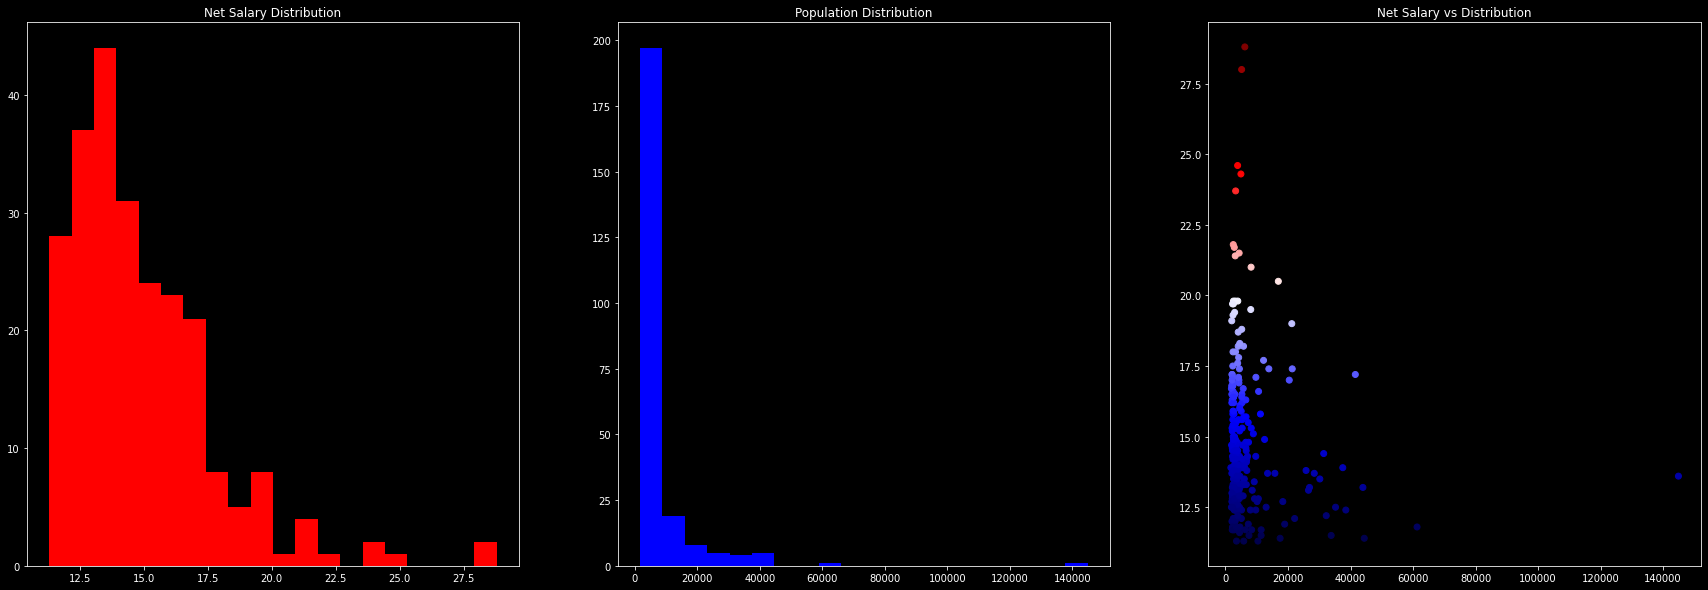

In [7]:
df_temp = df[df["closest_metropolis"] == city]
df_temp = df_temp[df_temp["libgeo"] != city]
# df_temp = df_temp[df_temp["population"] < 20000]

fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(30, 10))

axes[0].hist(
    df_temp["net_salary"],
    bins=20,
    color="red"
)

axes[0].set_title("Net Salary Distribution")

axes[1].hist(
    df_temp["population"],
    bins=20,
    color="b"
)
axes[1].set_title("Population Distribution")

axes[2].scatter(
    df_temp["population"],
    df_temp["net_salary"],
    cmap="seismic",
    c=df_temp["net_salary"]
)
axes[2].set_title("Net Salary vs Distribution")

plt.show()

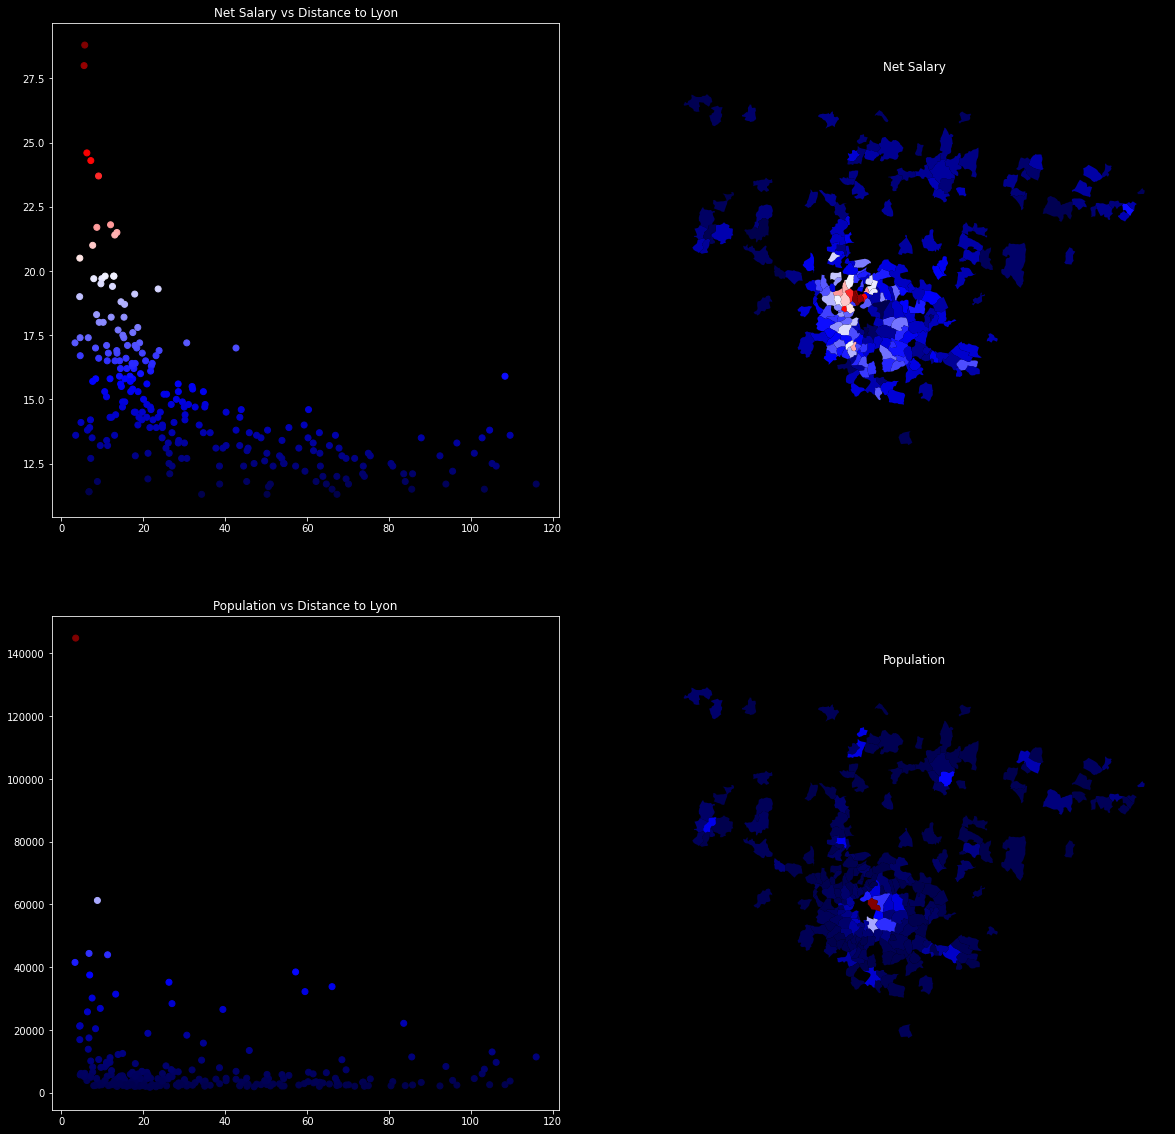

In [8]:
df_temp = df[df["closest_metropolis"] == city]
df_temp = df_temp[df_temp["libgeo"] != city]

fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(20, 20))

axes[0, 0].scatter(
    df_temp["dist_min"],
    df_temp["net_salary"],
    c=df_temp["net_salary"],
    cmap="seismic"
)

axes[0, 0].set_title(f"Net Salary vs Distance to {city}")


axes[1, 0].scatter(
    df_temp["dist_min"],
    df_temp["population"],
    c=df_temp["population"],
    cmap="seismic",
)

axes[1, 0].set_title(f"Population vs Distance to {city}")


df_temp.plot(
    df_temp["net_salary"],
    ax=axes[0, 1],
    cmap="seismic"
)

axes[0, 1].axis("off")
axes[0, 1].set_title("Net Salary")

df_temp.plot(
    df_temp["population"],
    ax=axes[1, 1],
    cmap="seismic"
)

axes[1, 1].axis("off")
axes[1, 1].set_title("Population")

plt.show()


In [9]:
df_temp.sort_values("population", ascending=False).head()

,codgeo,dep,reg,xcl2154,ycl2154,libgeo,net_salary,population,distance_to_angers,distance_to_avignon,...,distance_to_rennes,distance_to_rouen,distance_to_saintbrieuc,distance_to_saintetienne,distance_to_strasbourg,distance_to_toulouse,distance_to_tours,dist_min,closest_metropolis,geometry
3584,69266,69,84,846070.0,6520284.0,Villeurbanne,13.6,144884.0,456.326131,201.929315,...,562.667059,497.454720,654.404027,52.784330,380.160296,362.961064,368.044429,3.465255,Lyon,"POLYGON ((4.91770 45.74844, 4.92053 45.75360, ..."
3581,69259,69,84,846720.0,6512580.0,Vénissieux,11.8,61275.0,460.231899,194.230406,...,566.958603,504.166731,658.757806,48.211191,386.336618,358.393291,372.458059,8.771188,Lyon,"POLYGON ((4.88704 45.72610, 4.88760 45.72030, ..."
3580,69256,69,84,849195.0,6521696.0,Vaulx-en-Velin,11.4,44394.0,458.564329,203.383081,...,564.743047,498.090051,656.450247,56.014472,377.294887,366.238025,370.079543,6.730899,Lyon,"POLYGON ((4.95186 45.80891, 4.94611 45.80962, ..."
3604,69290,69,84,850620.0,6512414.0,Saint-Priest,13.2,43958.0,463.814288,194.139901,...,570.446107,506.514496,662.229253,51.266979,384.437078,361.259000,375.907845,11.262325,Lyon,"POLYGON ((4.90968 45.71805, 4.90214 45.71148, ..."
3510,69034,69,84,843100.0,6523589.0,Caluire-et-Cuire,17.2,41530.0,452.237845,205.239008,...,558.480199,493.046129,650.201398,53.171855,378.993178,362.956238,363.834867,3.300332,Lyon,"POLYGON ((4.85637 45.81844, 4.84779 45.81445, ..."


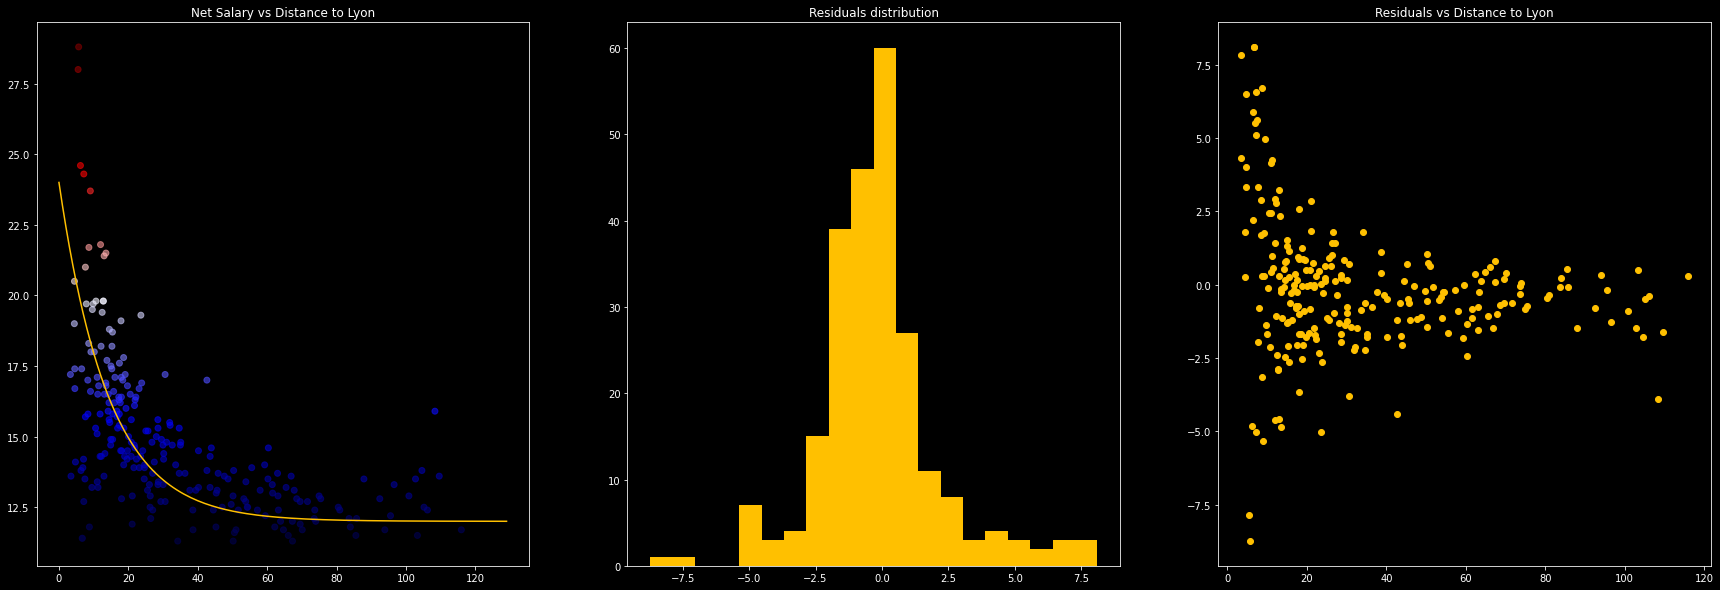

In [39]:

# rng = np.random.default_rng(1234)

def simulate_net_salary(
    xs,
    y0=12,
    base=12,
    alpha=0.07
):
    return (
        np.exp(- alpha * xs) * y0 + base
    )

predictions = simulate_net_salary(df_temp["dist_min"])

residuals = predictions - df_temp["net_salary"]


fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(30, 10))

axes[0].scatter(
    df_temp["dist_min"],
    df_temp["net_salary"],
    c=df_temp["net_salary"],
    cmap="seismic",
    alpha=.6
)

axes[0].plot(
    np.arange(130),
    simulate_net_salary(np.arange(130)),
    c=gold_yellow
)

axes[1].hist(
    residuals,
    color=gold_yellow,
    bins=20
)

axes[2].scatter(
    df_temp["dist_min"],
    residuals,
    color=gold_yellow
)

axes[0].set_title(f"Net Salary vs Distance to {city}")
axes[1].set_title("Residuals distribution")
axes[2].set_title(f"Residuals vs Distance to {city}")


plt.show()

In [44]:
from itertools import product

def grid_optimizer(alphas, y0s, bases, xs, ys, opt_function):
    
    best_score, best_params = 10, {}
    
    for alpha, y0, base in tqdm(product(alphas, y0s, bases)):
        predictions = simulate_net_salary(xs=xs, y0=y0, base=base, alpha=alpha)
        residuals = ys - predictions
        score = opt_function(residuals)
        if  score < best_score:
            best_params = {"alpha": alpha, "y0": y0, "base": base}
            best_score = score
    return best_score, best_params

def metric_function(residuals):
    return np.mean(np.abs(residuals))


best_score, best_params = grid_optimizer(
    alphas=[0.01 * i for i in range(1, 11)],
    y0s=[12 + i for i in range(8)],
    bases=[10, 11, 12, 13],
    opt_function=metric_function,
    xs=df_temp["dist_min"],
    ys=df_temp["net_salary"]
)

print(best_score / df_temp["net_salary"].mean())
best_params

320it [00:00, 1652.70it/s]

0.10382584544794347


{'alpha': 0.09, 'y0': 12, 'base': 13}

0.1192480068178112

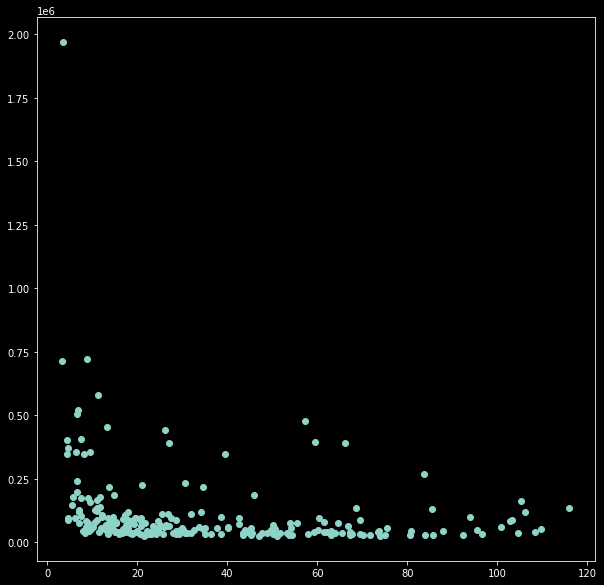

In [21]:
fig, ax = plt.subplots(1, 1, figsize=(10, 10))

ax.scatter(
    df_temp["dist_min"],
    df_temp["population"] * df_temp["net_salary"],
)

plt.show()